#### Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Read data and its metadata

In [2]:
airbnb = pd.read_csv("C:/Users/garadh/Downloads/AB_NYC_2019.csv")

airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [3]:
airbnb.shape

(48895, 16)

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Unique hosts
airbnb.host_id.nunique()

37457

In [6]:
airbnb.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
(airbnb.isnull().sum()/airbnb.shape[0]).sort_values(ascending=False)

last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
id                                0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

## Data Cleaning

### Dropping column

#### dropping "last_review" because it is not relevant in the analysis when we do have "reviews_per_month" column to understand poplarity of the listing
#### dropping "host_name" because we should not use this coloum in the analysis and we are not targeting host names for customer preference
#### dropping "name" that is listing names not important in the analysis

In [8]:
airbnb.drop(["last_review","host_name","name"],axis=1,inplace=True)

In [10]:
(airbnb.isnull().sum()/airbnb.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.205583
id                                0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

### Missing Imputation

##### reviews_per_month has 20 % null value it simply means 0 review per month so imput null with 0
##### "name"  column contains listing names so no need to need to imput since not necessary in the analysis

In [11]:
airbnb["reviews_per_month"].fillna(0,inplace=True)

In [12]:
(airbnb.isnull().sum()/airbnb.shape[0]).sort_values(ascending=False)

id                                0.0
host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

## Data Exploration

In [14]:
airbnb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [15]:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Univariate Analysis

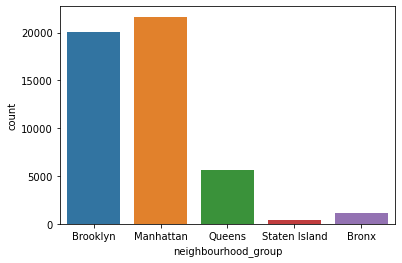

In [17]:
sns.countplot(data=airbnb,x="neighbourhood_group")
plt.show()

##### Manhattan gets maximum listings followed by Brooklyn and Staten Island observing very less listing count

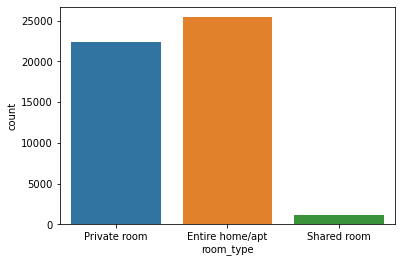

In [18]:
sns.countplot(data=airbnb,x="room_type")
plt.show()

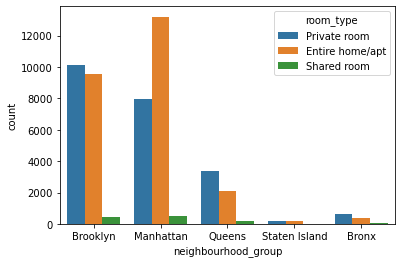

In [19]:
sns.countplot(data=airbnb,x="neighbourhood_group",hue="room_type")
plt.show()

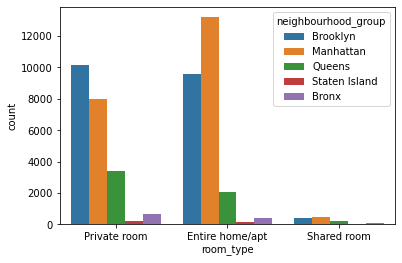

In [20]:
sns.countplot(data=airbnb,x="room_type",hue="neighbourhood_group")
plt.show()

In [21]:
airbnb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


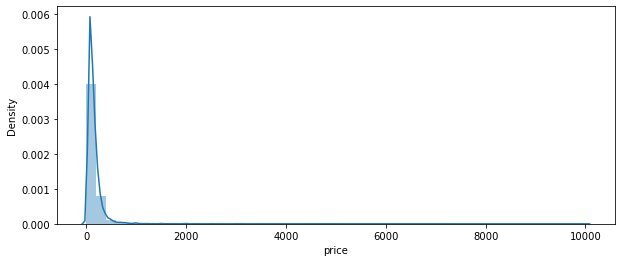

In [22]:
plt.figure(figsize=(10,4))
sns.distplot(airbnb["price"])
plt.show()

##### lets create new feature price per night

In [23]:
airbnb["price_per_night"] = airbnb["price"]/airbnb["minimum_nights"]

In [24]:
airbnb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,149.0
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,225.0
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,50.0
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,89.0
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,8.0


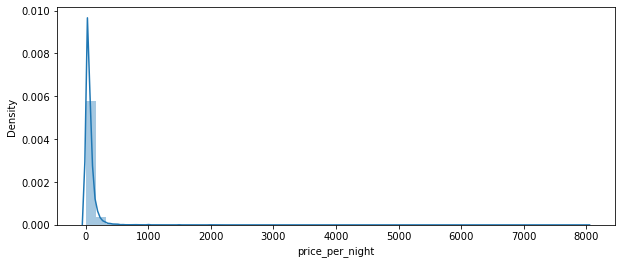

In [25]:
plt.figure(figsize=(10,4))
sns.distplot(airbnb["price_per_night"])
plt.show()

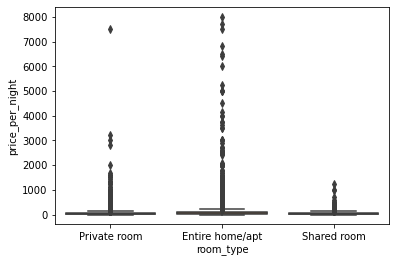

In [26]:
sns.boxplot(data=airbnb,y="price_per_night",x="room_type")
plt.show()

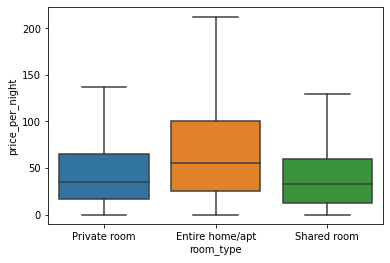

In [27]:
sns.boxplot(data=airbnb,y="price_per_night",x="room_type",showfliers=False)
plt.show()

In [28]:
airbnb[airbnb["room_type"] == "Private room"].price_per_night.quantile([0.25,0.5,0.75])

0.25    16.75
0.50    35.00
0.75    65.00
Name: price_per_night, dtype: float64

In [29]:
airbnb[airbnb["room_type"] == "Entire home/apt"].price_per_night.quantile([0.25,0.5,0.75])

0.25     24.875
0.50     55.000
0.75    100.000
Name: price_per_night, dtype: float64

In [30]:
airbnb[airbnb["room_type"] == "Shared room"].price_per_night.quantile([0.25,0.5,0.75])

0.25    12.5
0.50    32.5
0.75    60.0
Name: price_per_night, dtype: float64

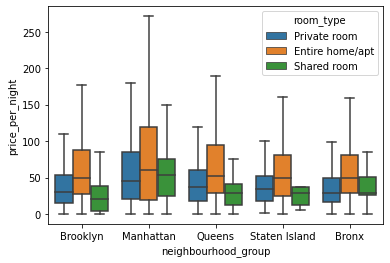

In [31]:
sns.boxplot(data=airbnb,x="neighbourhood_group",y="price_per_night",showfliers=False,hue="room_type")
plt.show()

##### Entire home/apt charges highest price ranges across all neighborhoods
##### Manhattan is the only neighborhood offers high price ranges per night across all room types

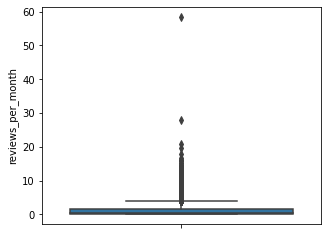

In [32]:
plt.figure(figsize=(5,4))
sns.boxplot(data=airbnb,y="reviews_per_month")
plt.show()

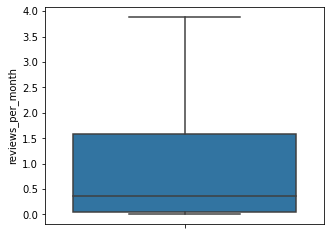

In [33]:
plt.figure(figsize=(5,4))
sns.boxplot(data=airbnb,y="reviews_per_month",showfliers=False)
plt.show()

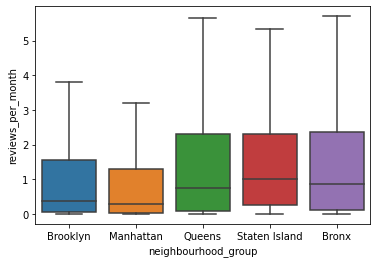

In [34]:
sns.boxplot(data=airbnb,x="neighbourhood_group",y="reviews_per_month",showfliers=False)
plt.show()

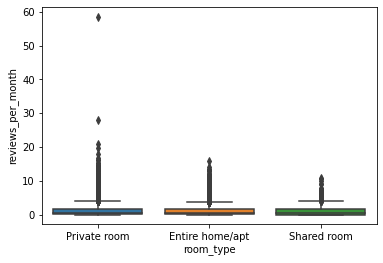

In [35]:
sns.boxplot(data=airbnb,x="room_type",y="reviews_per_month")
plt.show()

In [36]:
airbnb[airbnb["room_type"] == "Private room"].reviews_per_month.quantile([0.25,0.5,0.75])

0.25    0.04
0.50    0.40
0.75    1.65
Name: reviews_per_month, dtype: float64

In [37]:
airbnb[airbnb["room_type"] == "Entire home/apt"].reviews_per_month.quantile([0.25,0.5,0.75])

0.25    0.05
0.50    0.35
0.75    1.52
Name: reviews_per_month, dtype: float64

In [38]:
airbnb[airbnb["room_type"] == "Shared room"].reviews_per_month.quantile([0.25,0.5,0.75])

0.25    0.000
0.50    0.405
0.75    1.600
Name: reviews_per_month, dtype: float64

<Figure size 720x288 with 0 Axes>

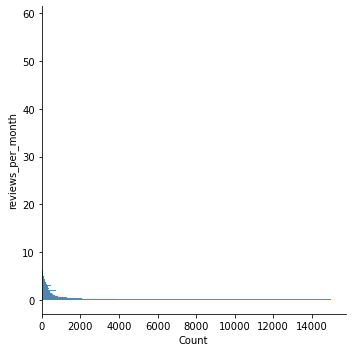

In [39]:
plt.figure(figsize=(10,4))
sns.displot(data=airbnb,y="reviews_per_month")
plt.show()

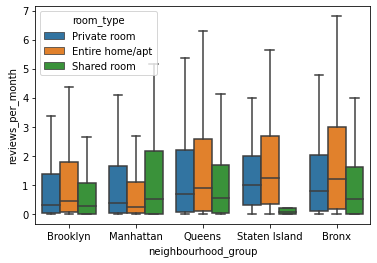

In [41]:
sns.boxplot(data=airbnb,x="neighbourhood_group",y="reviews_per_month",showfliers=False,hue="room_type")
plt.show()

#### Average Review per listing

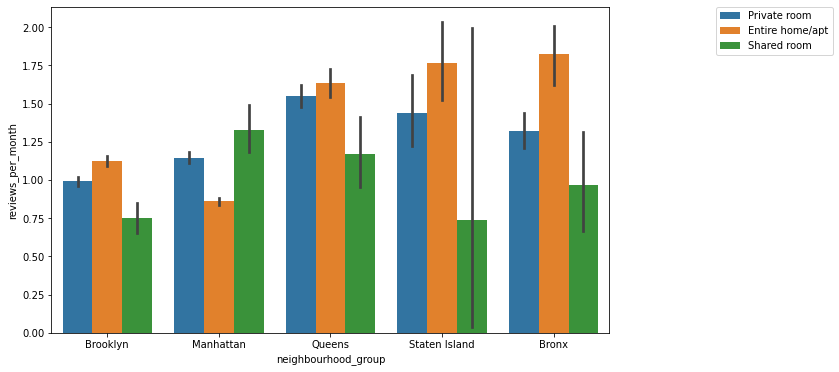

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(data=airbnb,x="neighbourhood_group",y="reviews_per_month",hue="room_type",estimator=np.mean)
plt.legend(bbox_to_anchor=(1.40, 1), borderaxespad=0)
plt.show()

##### Staten Island and Bronx neighborhoods are mostly  popular in Entire home/apt and Private room section

#### Reviews per month vs Minimum Nights

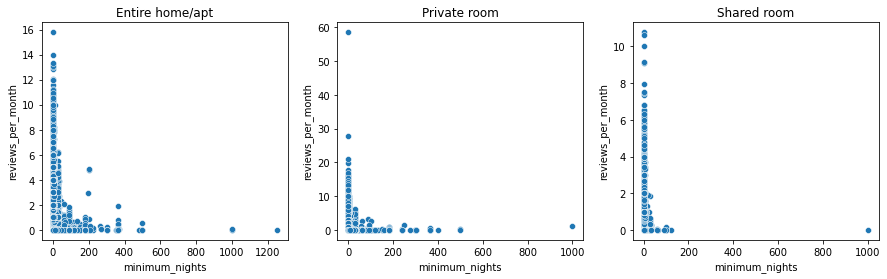

In [47]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(data=airbnb[airbnb.room_type == "Entire home/apt"],y="reviews_per_month",x="minimum_nights")
plt.title("Entire home/apt")
plt.subplot(1,3,2)
sns.scatterplot(data=airbnb[airbnb.room_type == "Private room"],y="reviews_per_month",x="minimum_nights")
plt.title("Private room")
plt.subplot(1,3,3)
sns.scatterplot(data=airbnb[airbnb.room_type == "Shared room"],y="reviews_per_month",x="minimum_nights")
plt.title("Shared room")
plt.show()

##### Customer is preferring listings that have minimum night stay across all room types.